In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('in/zad1_wch_5.txt', sep='\t', decimal=',')
df

,r,U
0,1.75,80.501217
1,1.76,74.604359
2,1.77,69.135185
3,1.78,64.061605
4,1.79,59.354055
...,...,...
1696,18.71,-0.000003
1697,18.72,-0.000003
1698,18.73,-0.000003
1699,18.74,-0.000003


<AxesSubplot:xlabel='r'>

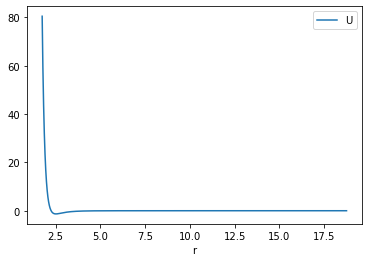

In [3]:
df.plot(x='r', y='U')

In [4]:
U_min = df['U'].min()
r_min = df['r'].loc[df['U'] == U_min]
r_min = r_min.min()

print("U_min =", U_min)
print("r_min =", r_min)

U_min = -1.31898489
r_min = 2.52


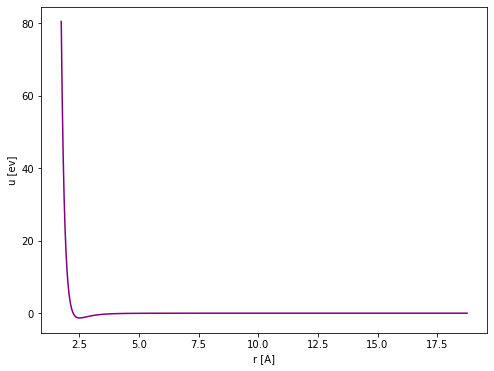

In [5]:

plt.figure(figsize=(8,6))
plt.plot(df['r'], df['U'], color = 'purple')

plt.xlabel('r [A]')
plt.ylabel('u [ev]')

plt.show()

1.75

In [15]:
r_min = df['r'].loc[df['U'] == df['U'].min()].min()

(array([ 53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),)

In [45]:

offset = 0.2
r_for_fit = df['r'].iloc[np.where((df['r'] > r_min - offset) & (df['r'] < r_min + offset))] - r_min
U_for_fit = df['U'].iloc[np.where((df['r'] > r_min - offset) & (df['r'] < r_min + offset))]
fit = np.polyfit(x=r_for_fit, y=U_for_fit, deg=3)
fit

array([-24.36559395,   9.25121603,   0.03191939,  -1.32400843])

In [46]:
x_fit = r_for_fit
y_fit = fit[0]*x_fit**3 + fit[1]*x_fit**2 + fit[2]*x_fit + fit[3]


# WAŻNE

opisać z czego sie biorą a i b, wykład 2 slajd 31

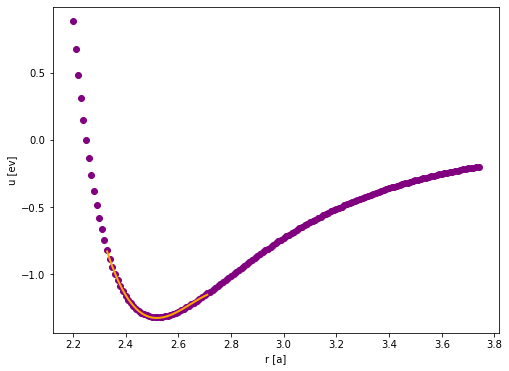

k = 2b =  18.502432069914875 [eV/A^2] =  296.4089617600363 [N/m]
x = -3a =  73.09678185357009 [eV/A^3] =  11710104452941.93 [N/m^2]


In [48]:
plt.figure(figsize=(8,6))

df_short = df[45:200].copy()
plt.scatter(df_short['r'], df_short['U'], color = 'purple')
plt.plot(x_fit + r_min, y_fit, color = 'orange', linewidth=2)

plt.xlabel('r [a]')
plt.ylabel('u [ev]')

plt.show()

print('k = 2b = ', 2*fit[1], '[eV/A^2] = ', 2*fit[1]*1.602*1e-19/1e-20, '[N/m]')
print('x = -3a = ', -3*fit[0], '[eV/A^3] = ', -3*fit[0]*1.602*1e-19/1e-30, '[N/m^2]')